### 결정트리

* 매우 쉽고 유연하게 적용 가능 \
데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음 \
예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며 이로 인한 과적합이 발생해 예측 성능이 저하될 수도 있다는 단점
* 이러한 단점 -> 앙상블에서는 오히려 장점이 됨 \
앙상블은 매우 많은 여러개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 \
오류가 발생한 부분에 대한 가중치를 계속 업데이트 하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 약한 학습기가 됨 (GBM,XGboost,LightGMBM 등)

In [2]:
1-(1/64)-(49/64)

0.21875

In [3]:
1-(9/64)-(25/64)

0.46875

### 정보 균일도 측정 방법

##### 정보이득 
엔트로피 <img src="img/entropy.png" width="500px" height="200px" title="gini"></img>\
* 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음
* 즉, 정보 이득이 높은 속성을 기준으로 분할



##### 지니계수 
<img src="img/gini.png" width="500px" height="200px" title="gini"></img>\
https://leedakyeong.tistory.com/entry/%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4Decision-Tree-CART-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EC%A7%80%EB%8B%88%EA%B3%84%EC%88%98Gini-Index%EB%9E%80
* 지니계수가 낮아지는 쪽으로 분류 / 0이 평등 1이 불평등 \
다양한 값을 가질수록 평등, 특정 값으로 쏠릴 경우 불평등 \
+) 지니지수입니다. 지니 계수는 높을수록 순도가 높지만, 지니 지수는 1- 지니 계수의 값으로 낮을 수록 순도가 높습니다

### Decision Tree

* max_depth : 트리의 최대 깊이 규정, 디폴트 None(완벽하게 클래스 결정 값 될 때까지 계속 분할 or 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이 증가)
* max_features : 최적 분할을 위해 고려할 최대 피처 개수 / 디폴트 None(데이터 세트 모든 피처 사용해 분할 수행) \
int(대상 피처의 개수), float(전체 피처 중 대상 피처의 퍼센트)
* min_samples_split : 노드 분할 위한 최소한의 샘플 데이터 수로 과적합 제어하는 데 사용, 디폴트 2 / 작게 설정할수록 분할되는 노드 많아져서 과적합 가능성 증가
* min_ssamples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수 / 과적합 제어 용도, 비대칭적 데이터인 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요
* max_leaf_nodes : 말단 노드의 최대 개수

#### sklearn.tree.DecisionTreeClassifier
* class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
* 파라미터 지니가 디폴트,entropy 가능 / 

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

#### 예측 한 번 해볼게 ~

In [88]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score, roc_auc_score
import numpy as np
from modules import g
import imp
imp.reload(g)

pred = dt_clf.predict(X_test)
pred_proba = dt_clf.predict_proba(X_test)[:,1]
accuracy = np.round(accuracy_score(y_test,pred),4)
# precision = precision_score(y_test,pred)
# recall = recall_score(y_test,pred)
# f1 = f1_score(y_test,pred)
# roc_score=roc_auc_score(y_test,pred_proba)

print(f'정확도 : {accuracy:.4f}')
# g.get_clf_eval(y_test,pred,pred_proba)

정확도 : 0.9333


#### sklearn.tree.export_graphviz (시각화)
* sklearn.tree.export_graphviz(decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3, fontname='helvetica')
* impurity True가 디폴트/ False 하면 불순도 계수(지니계수) 안보임
* 피처의 조건 -> 자식 노드를 만들기 위한 규칙 조건 , 이 조건이 없으면 리프 노드 / gini는 value=[]로 주어진 데이터 분포에서의 지니계수\
samples : 현 규칙에 해당하는 데이터 건수 / value = [] 클래스 값 기반의 데이터 건수  (붓꽃세트 경우 1,2,3, 세토사, 버시칼라,버지니카 품종 각 해당하는 데이터 수)
class : value 리스트 내에 가장 많은 건수를 가진 결정값

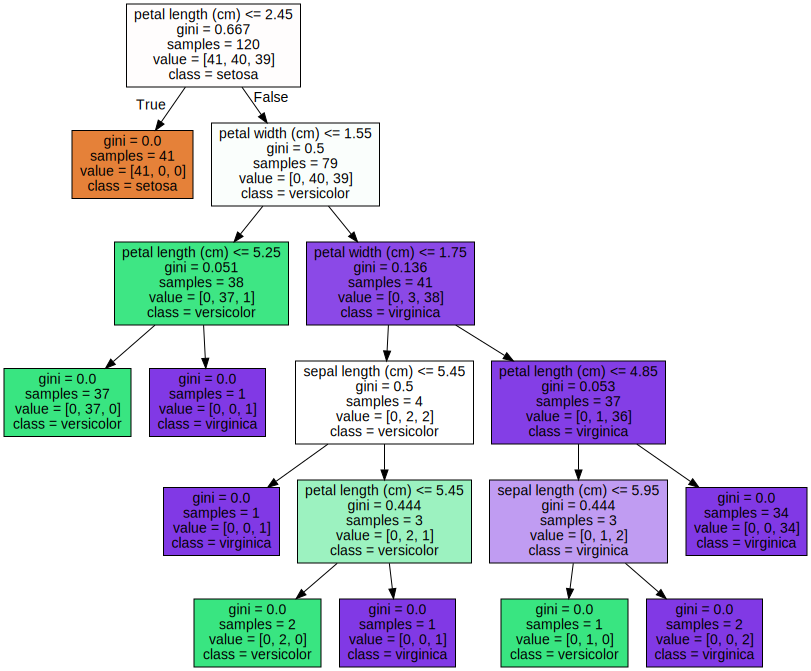

In [10]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [28]:
#피처 셀렉션 가능/ 중요도 높은 3,4 피처로
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

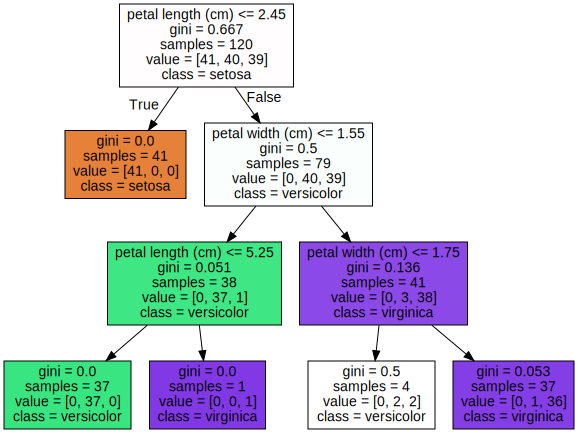

In [93]:
dt_clf_1 = DecisionTreeClassifier(max_depth=3,random_state=121)
dt_clf_1.fit(X_train, y_train)
export_graphviz(dt_clf_1, out_file="tree1.dot", class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)
with open('tree1.dot') as f:
    dot1_graph = f.read()
graphviz.Source(dot1_graph)


In [97]:
pred = dt_clf_1.predict(X_test)
pred_proba = dt_clf_1.predict_proba(X_test)[:,1]
accuracy = np.round(accuracy_score(y_test,pred),4)
print(f'정확도 : {accuracy:.4f}')

정확도 : 0.9333


#### 피처 셀렉션에 사용할 수 있다 ~ 각 피처 중요도 시각화 해볼게

"Feature importances: 
 [0.025 0.    0.555 0.42 ]
sepal length (cm) " 0.025
sepal width (cm) " 0.000
petal length (cm) " 0.555
petal width (cm) " 0.420


<AxesSubplot:>

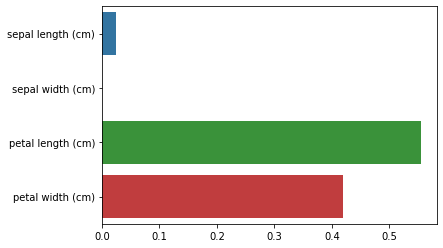

In [33]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print(f'"Feature importances: \n {np.round(dt_clf.feature_importances_,3)}')
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(f'{name} " {value:.3f}')

sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)

### 타이타닉 decision tree 적용해볼까

"Feature importances: 
 [0.089 0.284 0.258 0.045 0.023 0.233 0.049 0.02 ]
Pclass " 0.089
Sex " 0.284
Age " 0.258
SibSp " 0.045
Parch " 0.023
Fare " 0.233
Cabin " 0.049
Embarked " 0.020


<AxesSubplot:>

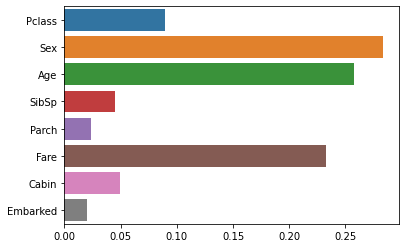

In [108]:
import pandas as pd
from modules import DtPre

titanic_df=pd.read_csv('datasets/titanic_train.csv',encoding='utf-8')
# DtPre.transform_features(titanic_df)
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = DtPre.transform_features(X_titanic_df)
dt_clf_2 = DecisionTreeClassifier(random_state=156)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)
dt_clf_2.fit(X_train, y_train)

print(f'"Feature importances: \n {np.round(dt_clf_2.feature_importances_,3)}')
for name, value in zip(X_titanic_df.keys(), dt_clf_2.feature_importances_):
    print(f'{name} " {value:.3f}')

sns.barplot(x=dt_clf_2.feature_importances_,y=X_titanic_df.keys())


In [119]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
X_train_1=X_train.iloc[:,[0,1,2,5,6]]
X_test_1 = X_test.iloc[:,[0,1,2,5,6]]

lr_clf.fit(X_train_1,y_train)
lr_pred = lr_clf.predict(X_test_1)
print(f'LogisticRegression 5개 피처 정확도 : {accuracy_score(y_test,lr_pred):.4f}')
lr_clf.fit(X_train,y_train)
lr_pred_1 = lr_clf.predict(X_test)
print(f'LogisticRegression 8개 피처 정확도 : {accuracy_score(y_test,lr_pred_1):.4f}')



LogisticRegression 5개 피처 정확도 : 0.8380
LogisticRegression 8개 피처 정확도 : 0.8492


#### 타이타닉 테스트 셋

In [121]:
titanic_df = pd.read_csv("datasets/titanic_train.csv")
y_titanic_df = titanic_df["Survived"]   # 레이블 데이터 셋 추출
X_titanic_df = titanic_df.drop("Survived", axis=1)  # 피쳐 데이터 셋에서 레이블셋은 삭제

X_titanic_df = DtPre.transform_features(X_titanic_df) # 만들어둔 전처리 함수 적용

titanic_test_df = pd.read_csv("datasets/titanic_test.csv")
y_titanic_test_df = titanic_test_df["Survived"]   # 레이블 데이터 셋 추출
X_titanic_test_df = titanic_test_df.drop("Survived", axis=1)  # 피쳐 데이터 셋에서 레이블셋은 삭제

X_titanic_test_df = DtPre.transform_features(X_titanic_test_df) # 만들어둔 전처리 함수 적용

In [122]:
titanic_clf = DecisionTreeClassifier(random_state=121)

# X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
#                                                     test_size=0.2, random_state=121)

titanic_clf.fit(X_titanic_df, y_titanic_df)

DecisionTreeClassifier(random_state=121)

Feature Importance : [0.082 0.306 0.271 0.041 0.019 0.208 0.051 0.021]
Pclass : 0.082
Sex : 0.306
Age : 0.271
SibSp : 0.041
Parch : 0.019
Fare : 0.208
Cabin : 0.051
Embarked : 0.021


<AxesSubplot:>

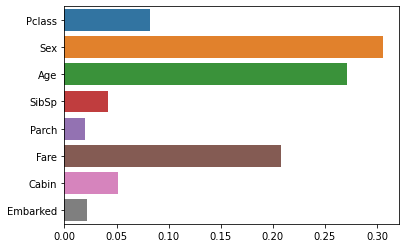

In [123]:
# feature importance 추출
print(f"Feature Importance : {np.round(titanic_clf.feature_importances_, 3)}")

# feature 별 importance 매핑
features = []
for name, value in zip(X_titanic_df.columns, titanic_clf.feature_importances_) :
    print(f"{name} : {value:.3f}")
    features.append({name : np.round(value, 3)})

# feature importance를 column별로 시각화 하기
sns.barplot(x=titanic_clf.feature_importances_, y=X_titanic_df.columns)

In [124]:
titanic_lr = LogisticRegression()

titanic_lr.fit(X_titanic_df, y_titanic_df)

pred_all = titanic_lr.predict(X_titanic_df)

print(np.round(accuracy_score(y_titanic_df, pred_all),3))

0.792


In [125]:
X_train_feat = X_titanic_df[["Pclass", "Sex", "Age", "Fare", "Cabin"]]
X_test_feat = X_titanic_test_df[["Pclass", "Sex", "Age", "Fare", "Cabin"]]

In [126]:
titanic_lr_feat = LogisticRegression()

titanic_lr_feat.fit(X_train_feat, y_titanic_df)

pred_feat = titanic_lr_feat.predict(X_test_feat)

print(np.round(accuracy_score(y_titanic_test_df, pred_feat),3))

0.95


### 결정트리 과적합

#### sklearn.datasets.make_classification
* sklearn.datasets.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
* 사이킷런 패키지로 가상의 분류모형 데이터를 생성해주는 함수

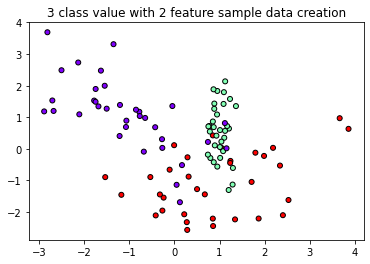

In [129]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 class value with 2 feature sample data creation")
#2차원 시각화 위해 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)
#독립 변수의 수 / 독립 변수 중 다른 독립 변수의 선형조합으로 나타나는 성분의 수 / 독립변수중 종속변수와 상관관계가 있는 성분의 수 / 종속 변수의 클래스 수 / 클래스 당 클러스터의 수 /

#plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색으로 표시 됨
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels, s=25, cmap='rainbow',edgecolors='k')

#### numpy.meshgrid
* numpy.meshgrid(*xi, copy=True, sparse=False, indexing='xy')

#### numpy.linspace
* numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
* 지정된 간격 동안 균일한 간격의 숫자를 반환 /간격 [ start , stop ] 동안 계산된 균일한 간격 의 샘플 수를 반환

In [131]:
#classification의 Decision Boundary 시각화 하는 함수
def visualize_boundary(model,X,y):
    fig,ax = plt.subplots()
    #학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:,0],X[:,1],c=y,s=25,cmap='rainbow',edgecolors='k',clim=(y.min(),y.max()),zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    #호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X,y)
    xx,yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end,num=200))
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

    #contourf()를 이용하여 class boundary를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx,yy,Z,alpha=0.3, levels=np.arange(n_classes+1)-0.5, cmap='rainbow',clim=(y.min(),y.max()), zorder=1)

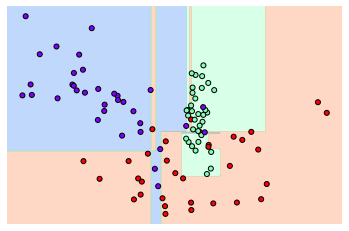

In [132]:
from sklearn.tree import DecisionTreeClassifier

#특정 트리 생성 제약없는 결정 트리의 decision boundary 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

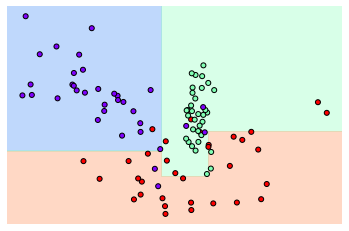

In [133]:
#min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)